In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [2]:
X,y = make_regression(n_samples=4 , n_features=1 ,n_informative=1 ,n_targets =1, noise =80,random_state=13)

In [3]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [4]:
X.ravel()

array([-0.71239066,  0.45181234, -0.04450308,  0.75376638])

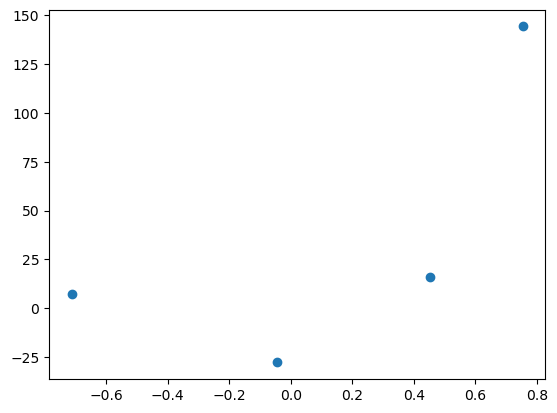

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [7]:
#lets apply OLS
from sklearn.linear_model import LinearRegression

In [8]:
reg= LinearRegression()
reg.fit(X,y)

LinearRegression()

In [9]:
reg.coef_          #value of m weightage

array([78.35063668])

In [10]:
reg.intercept_              # value of b 

26.15963284313262

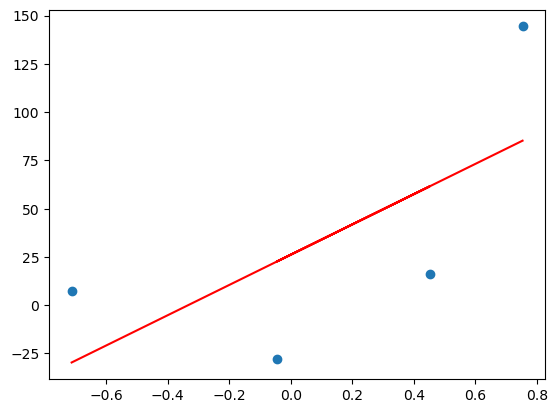

In [11]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [12]:
#lets apply Gradient Descent assuming slope is constant m= 78.35
# and let's assume the starting value for intercept b=0
y_pred = ((78.35 *X)+0).reshape(4)

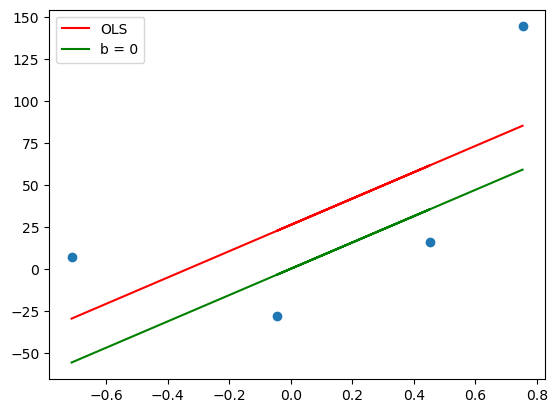

In [15]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red' , label="OLS")
plt.plot(X,y_pred, color = 'green',label = 'b = 0')
plt.legend()
plt.show()

In [16]:
m = 78.35
b=0
loss_slope =  -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [17]:
# lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [18]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

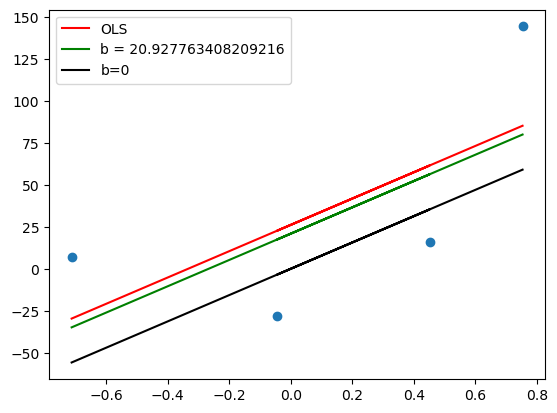

In [19]:
y_pred1 = ((78.35 * X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label ="OLS")
plt.plot(X,y_pred1,color = 'green',label= 'b = {}'.format(b))
plt.plot(X,y_pred ,color= 'black',label = 'b=0')
plt.legend()
plt.show()

In [20]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b )
loss_slope

-41.85552681641843

In [21]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [22]:
b = b - step_size
b

25.11331608985106

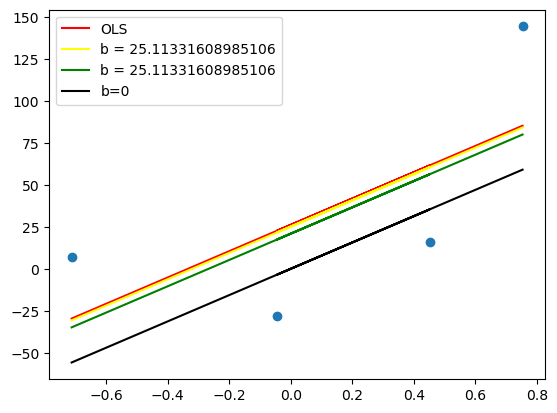

In [23]:
y_pred2 = ((78.35 * X)+ b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color = 'red',label ="OLS")
plt.plot(X,y_pred2,color = "Yellow",label ='b = {}'.format(b))
plt.plot(X,y_pred1,color = 'green',label= 'b = {}'.format(b))
plt.plot(X,y_pred ,color= 'black',label = 'b=0')
plt.legend()
plt.show()

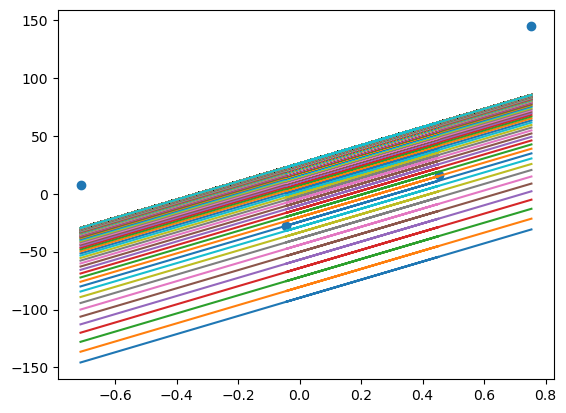

In [28]:
b = -100
m = 78.35
lr =0.01

epochs = 1000

for i in range(epochs):
    loss_slope = -2 * np.sum(y - m*X.ravel() - b)
    b = b - (lr * loss_slope)
    
    y_pred = m* X+ b
    plt.plot(X,y_pred)
    
plt.scatter(X,y)

In [39]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict

In [56]:
x,y = make_regression(n_samples=100 , n_features = 1 , n_informative =1 ,n_targets = 1,noise =20)

In [57]:
x.ndim

2

In [58]:
x.ravel().ndim

1

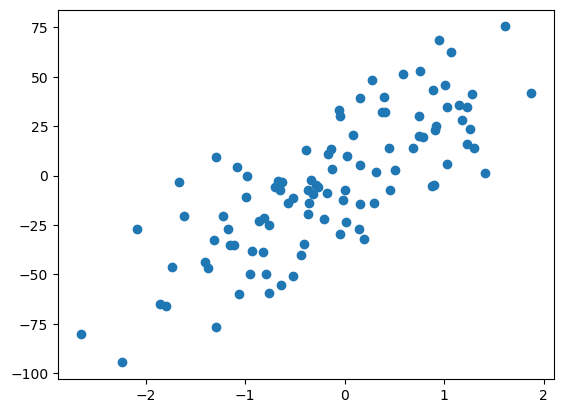

In [59]:
plt.scatter(x,y)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(x,y)
print(lr.coef_) 
print(lr.intercept_)

[28.11305541]
0.16031206534391185


In [64]:
m = 28.1130
# b =-120

In [68]:
class GD:
    def __init__(self, learning_rate,epochs):
        self.m = 28.1130
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,x,y):
        #calcualte the b using GD
        for i in range(self.epochs):
            loss_slope = -2 *np.sum(y - self.m*x.ravel() -self.b)
            self.b = self.b - (self.lr * loss_slope)
        print(self.b)
            

In [69]:
gd = GD(0.001,100)

In [70]:
gd.fit(x,y)

0.16030347837365364


# for both m and b

In [71]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np

In [72]:
x,y =make_regression(n_samples = 100 ,n_features = 1 , n_informative = 1, n_targets = 1, noise =20 , random_state= 13)

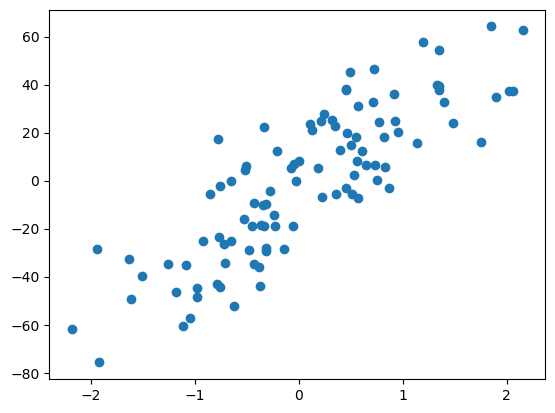

In [73]:
plt.scatter(x,y)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(x,y)

LinearRegression()

In [77]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
np.mean(cross_val_score(lr,x,y,scoring = 'r2',cv = 10))

0.6375011587464419

In [80]:
class GdRegressor:
    def __init__(self , learning_rate, epochs):
        self.m = 100
        self.b= -200
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self , x,y):
        #calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y- self.m*x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y- self.m*x.ravel() - self.b)*x.ravel())
           
            self.b = self.b-(self.lr *loss_slope_b)
            self.m = self.m-(self.lr *loss_slope_m)
        print(self.m,self.b)
        
    def predict(self ,x):
        return self.m*x+ self.b

In [81]:
gd = GdRegressor(0.001,100)

In [82]:
gd.fit(x,y)

27.828092091490532 -2.294744988536735


# by xtrain

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [85]:
gd.fit(x_train,y_train)

28.23365737992021 -2.160744319988379


In [86]:
y_pred= gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7956135991860911

In [87]:
x_train.shape[0]

80

# Gradint Descent 
Batch GD on
Multiple columns

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
X,y = load_diabetes(return_X_y = True)

In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state=2)

In [6]:
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [7]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [8]:
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [46]:
class GDRegressor:
     
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef = None
        self.intercept_= None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,x_train,y_train):
        self.intercept_= 0 
        self.coef_ = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            #update all the coef and the intercept
            #vectorization
            y_hat = np.dot(x_train,self.coef_)+ self.intercept_  #hole data is store v
            intercept_der = -2 * np.mean(y_train -y_hat)
            self.intercept_ = self.intercept_ - (self.lr *intercept_der)
            
            coef_der = -2 *np.dot((y_train - y_hat),x_train)/x_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
            
        print(self.intercept_,self.coef_)
        
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [47]:
np.dot(x_train,np.ones(x_train.shape[1])).shape

(353,)

In [48]:
y_train.shape

(353,)

In [49]:
gd = GDRegressor(epochs= 1000 ,learning_rate = 0.01)

In [50]:
gd.fit(x_train,y_train)

150.7529235828462 [ 15.98156223   3.59524752  41.65671073  32.55163341  14.77244856
  11.42882105 -24.66648529  27.6427229   41.18745291  25.180466  ]


In [52]:
# y_pred = gd.predict(x_test)
r2_score(y_test,y_pred)

0.1036656910899234

# Stochastic Gradient Descent

In [38]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [39]:
X,y = load_diabetes(return_X_y = True)

In [40]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2 ,random_state=2)

In [42]:
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [44]:
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [45]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef = None
        self.intercept_= None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,x_train,y_train):
        self.intercept_= 0 
        self.coef_ = np.ones(x_train.shape[1])
        for i in range(self.epochs):
            for j in  range(x_train.shape[0]):
                idx= np.random.randint(0,x_train.shape[0])
                
                y_hat  = np.dot(x_train[idx] , self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y.hat),x_train[idx])
                self.coef_ = self.coef_ - (self.lr *coef_der)
         
        
        print(self.intercept_,self.coef_)
        
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [46]:
gd = GDRegressor( learning_rate = 0.1,epochs= 30)

In [47]:
gd.fit(x_train,y_train)

150.35868498128974 [ 5.83816284  1.85499942 13.52450458 10.89459782  5.45439511  4.33943591
 -6.89929066  9.29388458 13.62840629  8.63807009]


In [48]:
r2_score(y_test,y_pred)

0.4399338661568968